In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read data from csv file
data_train = pd.read_csv('hw14_train.csv')
data_test = pd.read_csv('hw14_test.csv')

In [3]:
data_train.head(8)

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,26.0,4,116,75,2246,14.0,european
1,13.0,8,400,170,4746,12.0,american
2,18.0,8,307,130,3504,12.0,american
3,14.5,8,351,152,4215,12.8,american
4,31.0,4,112,85,2575,16.2,american
5,14.0,8,318,150,4077,14.0,american
6,15.5,8,318,145,4140,13.7,american
7,28.0,4,151,90,2678,16.5,american


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           275 non-null    float64
 1   cylinders     275 non-null    int64  
 2   displacement  275 non-null    int64  
 3   horsepower    275 non-null    int64  
 4   weight        275 non-null    int64  
 5   acceleration  275 non-null    float64
 6   origin        275 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 15.2+ KB


In [7]:
np.sum(data_train.isnull(), axis = 0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
dtype: int64

In [9]:
#Check if there is duplicate rows
np.sum(data_train.duplicated())

np.int64(1)

In [10]:
data_train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,23.145091,5.512727,197.661818,105.192727,3006.785455,15.520727
std,7.605300,1.724348,105.095639,38.545773,840.723898,2.816655
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,107.000000,77.500000,2265.000000,13.800000
50%,22.000000,4.000000,151.000000,93.000000,2833.000000,15.500000
75%,28.700000,8.000000,302.000000,129.500000,3614.500000,17.000000
max,44.000000,8.000000,455.000000,225.000000,4997.000000,24.800000


In [12]:
#Pearson Correlation analysis
var_ind=[0,1,2,3,4,5]
corr_table = round(data_train.iloc[:, var_ind].corr(method = 'pearson'), 2)
corr_table

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.00,-0.80,-0.82,-0.80,-0.84,0.46
cylinders,-0.80,1.00,0.95,0.84,0.89,-0.50
displacement,-0.82,0.95,1.00,0.89,0.94,-0.54
horsepower,-0.80,0.84,0.89,1.00,0.87,-0.67
weight,-0.84,0.89,0.94,0.87,1.00,-0.39
acceleration,0.46,-0.50,-0.54,-0.67,-0.39,1.00


In [13]:
print(data_train['origin'].value_counts())

origin
american    173
japanese     52
european     50
Name: count, dtype: int64


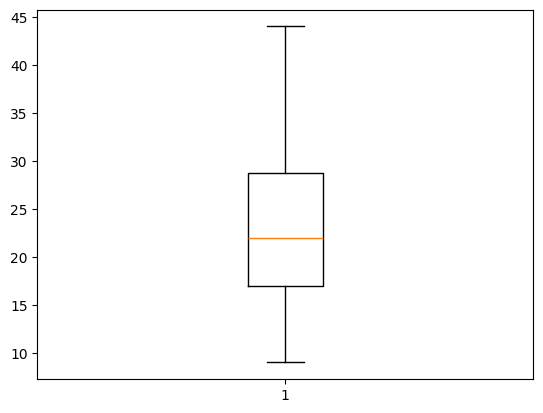

In [15]:
#Check for outliers
plt.boxplot(data_train['mpg'])
plt.show()

In [16]:
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(data_train['origin'])
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   american  275 non-null    bool 
 1   european  275 non-null    bool 
 2   japanese  275 non-null    bool 
dtypes: bool(3)
memory usage: 957.0 bytes


In [17]:
#Define base level for each categorical variable
dummy_vars.drop(columns = ['american'], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   european  275 non-null    bool 
 1   japanese  275 non-null    bool 
dtypes: bool(2)
memory usage: 682.0 bytes


In [18]:
dummy_vars.head()

,european,japanese
0,True,False
1,False,False
2,False,False
3,False,False
4,False,False


### Define feature matrix 

In [19]:
X_ = data_train[['cylinders','displacement','horsepower','weight','acceleration']]
X_train = pd.concat([X_, dummy_vars], axis = 1)
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,european,japanese
0,4,116,75,2246,14.0,True,False
1,8,400,170,4746,12.0,False,False
2,8,307,130,3504,12.0,False,False
3,8,351,152,4215,12.8,False,False
4,4,112,85,2575,16.2,False,False


In [20]:
#Define response matrix
y_train = data_train['mpg']
print(y_train)

0      26.0
1      13.0
2      18.0
3      14.5
4      31.0
       ... 
270    35.0
271    27.4
272    13.0
273    28.4
274    27.0
Name: mpg, Length: 275, dtype: float64


# Linear regression - model 1

In [21]:
from sklearn.linear_model import LinearRegression

#Create linear regression model
model_1 = LinearRegression()

#Fit the linear regressor on the train
model_1.fit(X_train, y_train)


#Linear regression coefficients
print(model_1.coef_)
print(model_1.intercept_)

[-1.01859786  0.01913343 -0.0451973  -0.00541923  0.18647737  0.80755839
  1.99693286]
42.60858602353307


In [22]:
#Predict the response in the train
y_train_pred_1 = model_1.predict(X_train)

#Calculare residuals
res_1 = y_train - y_train_pred_1

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score

#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_1)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_1) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_1)))

RMSE: 3.853
MAPE: 13.297
R2: 0.742


### plot histogram of residuals

In [23]:
def hist_residuals(res, bins = 50):
    #Calculate density
    from scipy import stats
    density = stats.gaussian_kde(res)
    xp = np.linspace(np.min(res), np.max(res), 100)
    yp = density.pdf(xp)

    #Histogram
    plt.hist(res, bins = bins, 
             color = 'red', alpha = 0.7, density = True)
    plt.axvline(np.mean(res), color = 'black', 
                linewidth = 2, linestyle = '--', label = "Average")
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.plot(xp, yp, color = 'black', linewidth = 2)
    plt.legend()
    
    return plt.show()

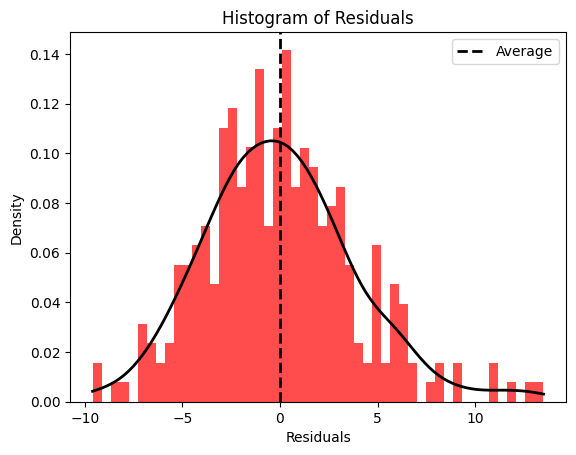

In [24]:
#Histogram of residuals - model 1
hist_residuals(res_1)

### test data

In [26]:
#Create dummy variables for categorical variables
dummy_vars = pd.get_dummies(data_test['origin'])
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   american  117 non-null    bool 
 1   european  117 non-null    bool 
 2   japanese  117 non-null    bool 
dtypes: bool(3)
memory usage: 483.0 bytes


In [27]:
#Define base level for each categorical variable
dummy_vars.drop(columns = ['american'], inplace = True)
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   european  117 non-null    bool 
 1   japanese  117 non-null    bool 
dtypes: bool(2)
memory usage: 366.0 bytes


In [28]:
#Define response matrix
y_test = data_test['mpg']
print(y_test)

0      14.0
1      18.0
2      28.8
3      20.0
4      30.9
       ... 
112    21.0
113    32.0
114    25.1
115    18.0
116    18.1
Name: mpg, Length: 117, dtype: float64


In [29]:
X_ = data_test[['cylinders','displacement','horsepower','weight','acceleration']]
X_test = pd.concat([X_, dummy_vars], axis = 1)
X_test.head()

,cylinders,displacement,horsepower,weight,acceleration,european,japanese
0,8,318.0,150,4096,13.0,False,False
1,6,258.0,110,2962,13.5,False,False
2,6,173.0,115,2595,11.3,False,False
3,4,140.0,90,2408,19.5,False,False
4,4,105.0,75,2230,14.5,False,False


In [33]:
#Prediction
y_test_pred_1 = model_1.predict(X_test)

#Absolute error
abs_err_1 = abs(data_test['mpg'] - y_test_pred_1)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.DataFrame({'RMSE': root_mean_squared_error(data_test['mpg'], y_test_pred_1),
                            'MAPE': mean_absolute_percentage_error(data_test['mpg'], y_test_pred_1) * 100,
                            'MAE' : abs_err_1.mean(),
                            'Median of AbsErrors' : abs_err_1.median(),
                            'SD of AbsErrors' :     abs_err_1.std(),
                            'IQR of AbsErrors':     iqr(abs_err_1),
                            'Min of AbsErrors':     abs_err_1.min(),
                            'Max of AbsErrors':     abs_err_1.max()}, 
                           index = ['LM - All Features'])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,4.796951,14.737398,3.563689,2.674679,3.224864,3.919394,0.008318,15.45785


# Decision Tree (Post prunning approach)

In [35]:
#Decision Tree - model 3
from sklearn.tree import DecisionTreeRegressor


#Create decision tree model
model_2 = DecisionTreeRegressor(criterion = 'squared_error',
                                max_depth = 10, 
                                min_samples_leaf = 5, 
                                ccp_alpha = 0)

#Fit the decision tree regressor on the train
model_2.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0


### Plot the Tree

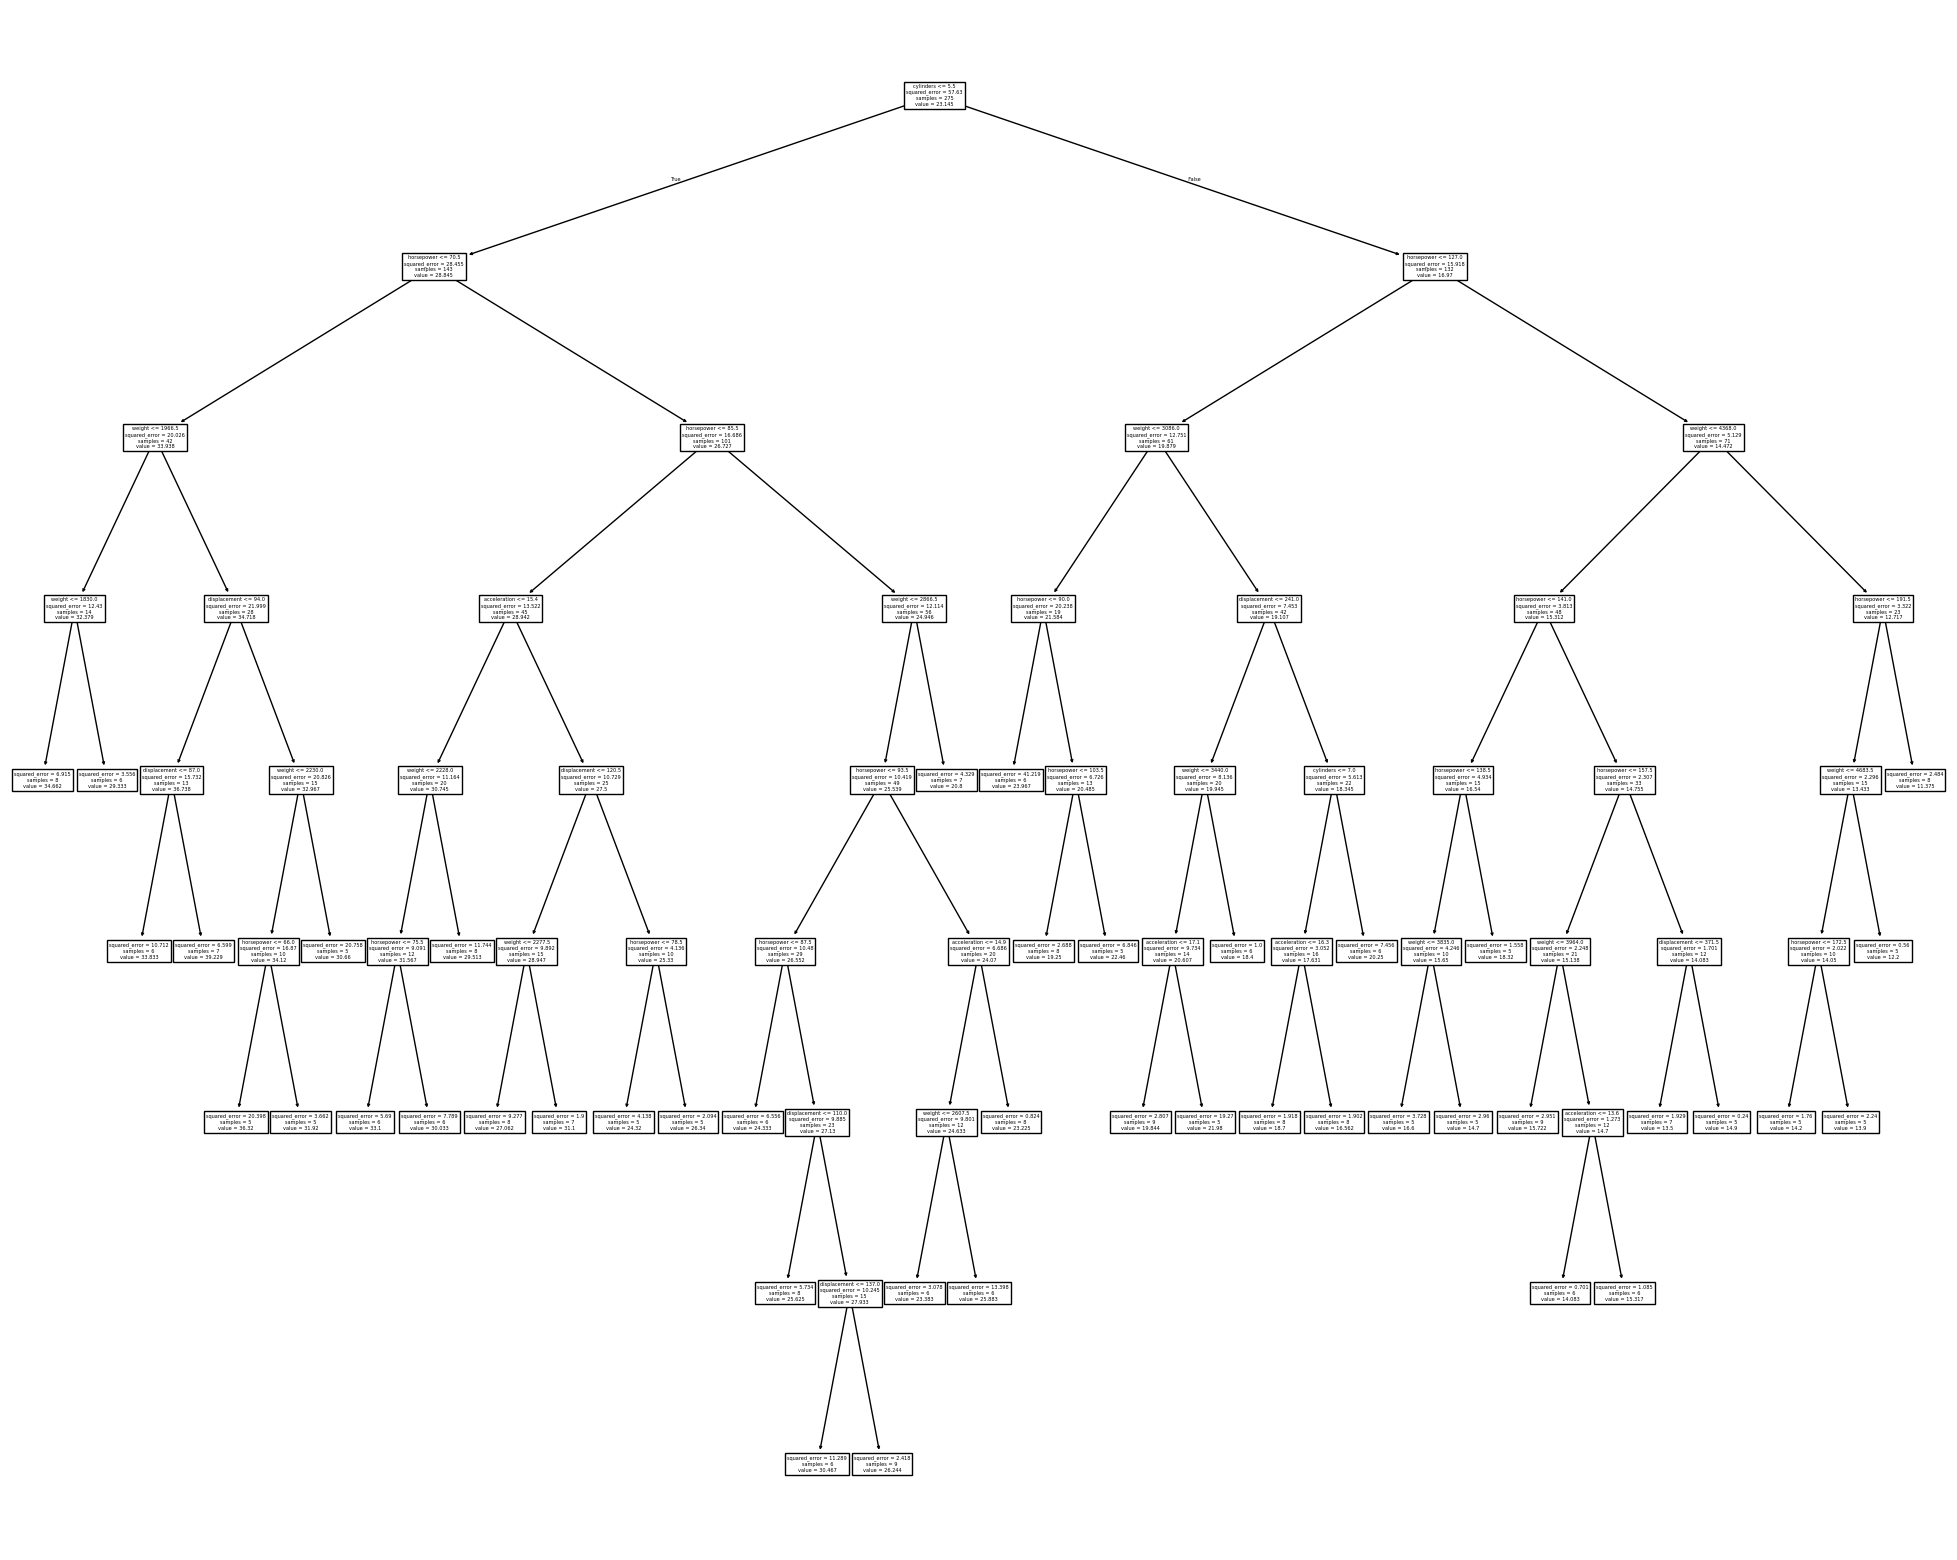

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25, 20))
plot_tree(model_2, feature_names = X_train.columns)
plt.show()

In [38]:
#Post prunning
prunning_path = model_2.cost_complexity_pruning_path(X_train, y_train)
prunning_path

{'ccp_alphas': array([0.00000000e+00, 8.18181818e-04, 1.65939394e-02, 1.95417027e-02,
        2.07878788e-02, 3.08931917e-02, 3.28181818e-02, 3.70945455e-02,
        4.14848485e-02, 5.14006061e-02, 5.33056854e-02, 6.64568182e-02,
        7.44007792e-02, 8.03807642e-02, 8.64109091e-02, 8.81225758e-02,
        1.03143604e-01, 1.15290629e-01, 1.19544298e-01, 1.56616394e-01,
        1.60555152e-01, 1.81000025e-01, 2.21303939e-01, 2.65097864e-01,
        2.85387879e-01, 2.91887908e-01, 3.10514556e-01, 3.80793158e-01,
        4.25455556e-01, 5.00156215e-01, 1.44861367e+00, 3.48795933e+00,
        5.60966072e+00, 3.51933547e+01]),
 'impurities': array([ 6.02541316,  6.02623134,  6.04282528,  6.06236698,  6.08315486,
         6.11404805,  6.14686624,  6.18396078,  6.22544563,  6.32824684,
         6.38155253,  6.44800935,  6.52241013,  6.60279089,  6.6892018 ,
         6.86544695,  7.07173416,  7.18702479,  7.30656908,  7.77641827,
         8.09752857,  8.27852859,  8.49983253,  8.7649304 ,  9

In [39]:
#Grid
alpha_grid = prunning_path['ccp_alphas']

In [41]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = len(alpha_grid)) #to save cv results

import time #to measure the processing time
start_time = time.time()
for i in range(len(alpha_grid)):
    tree_reg = DecisionTreeRegressor(criterion = 'squared_error',
                                     max_depth = 10, 
                                     min_samples_leaf = 5, 
                                     ccp_alpha = alpha_grid[i])
    scores = cross_val_score(estimator = tree_reg, 
                             X = X_train, 
                             y =  y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html

end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  11.205084800720215 seconds


In [42]:
#Best alpha
best_alpha = alpha_grid[np.argmax(cv_errors)]
print(best_alpha)

0.5001562152134194


In [44]:
import itertools

max_depth = [2, 5,8,10]
min_samples_leaf = [5,8,10, 15]
ccp_alpha=[0.5001562152134194]
params_grid = list(itertools.product( max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1, 17), 
                           columns = [ 'max_depth', 
                                      'min_samples_leaf'])
params_grid

,max_depth,min_samples_leaf
1,2,5
2,2,8
3,2,10
4,2,15
5,5,5
6,5,8
7,5,10
8,5,15
9,8,5
10,8,8


In [48]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

import time #to measure the processing time
start_time = time.time()
cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg = DecisionTreeRegressor( 
                                   criterion = 'squared_error',
                                   max_depth = params_grid.iloc[i, 0], 
                                   min_samples_leaf = params_grid.iloc[i, 1], 
                                   ccp_alpha =0.5001562152134194 )
    scores = cross_val_score(estimator = rf_reg, 
                             X = X_train, 
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  15.089474439620972 seconds


In [49]:
#Best model
params_grid.iloc[np.argmax(cv_errors), :]

max_depth           5
min_samples_leaf    5
Name: 5, dtype: int64

## Best model for Decision Tree

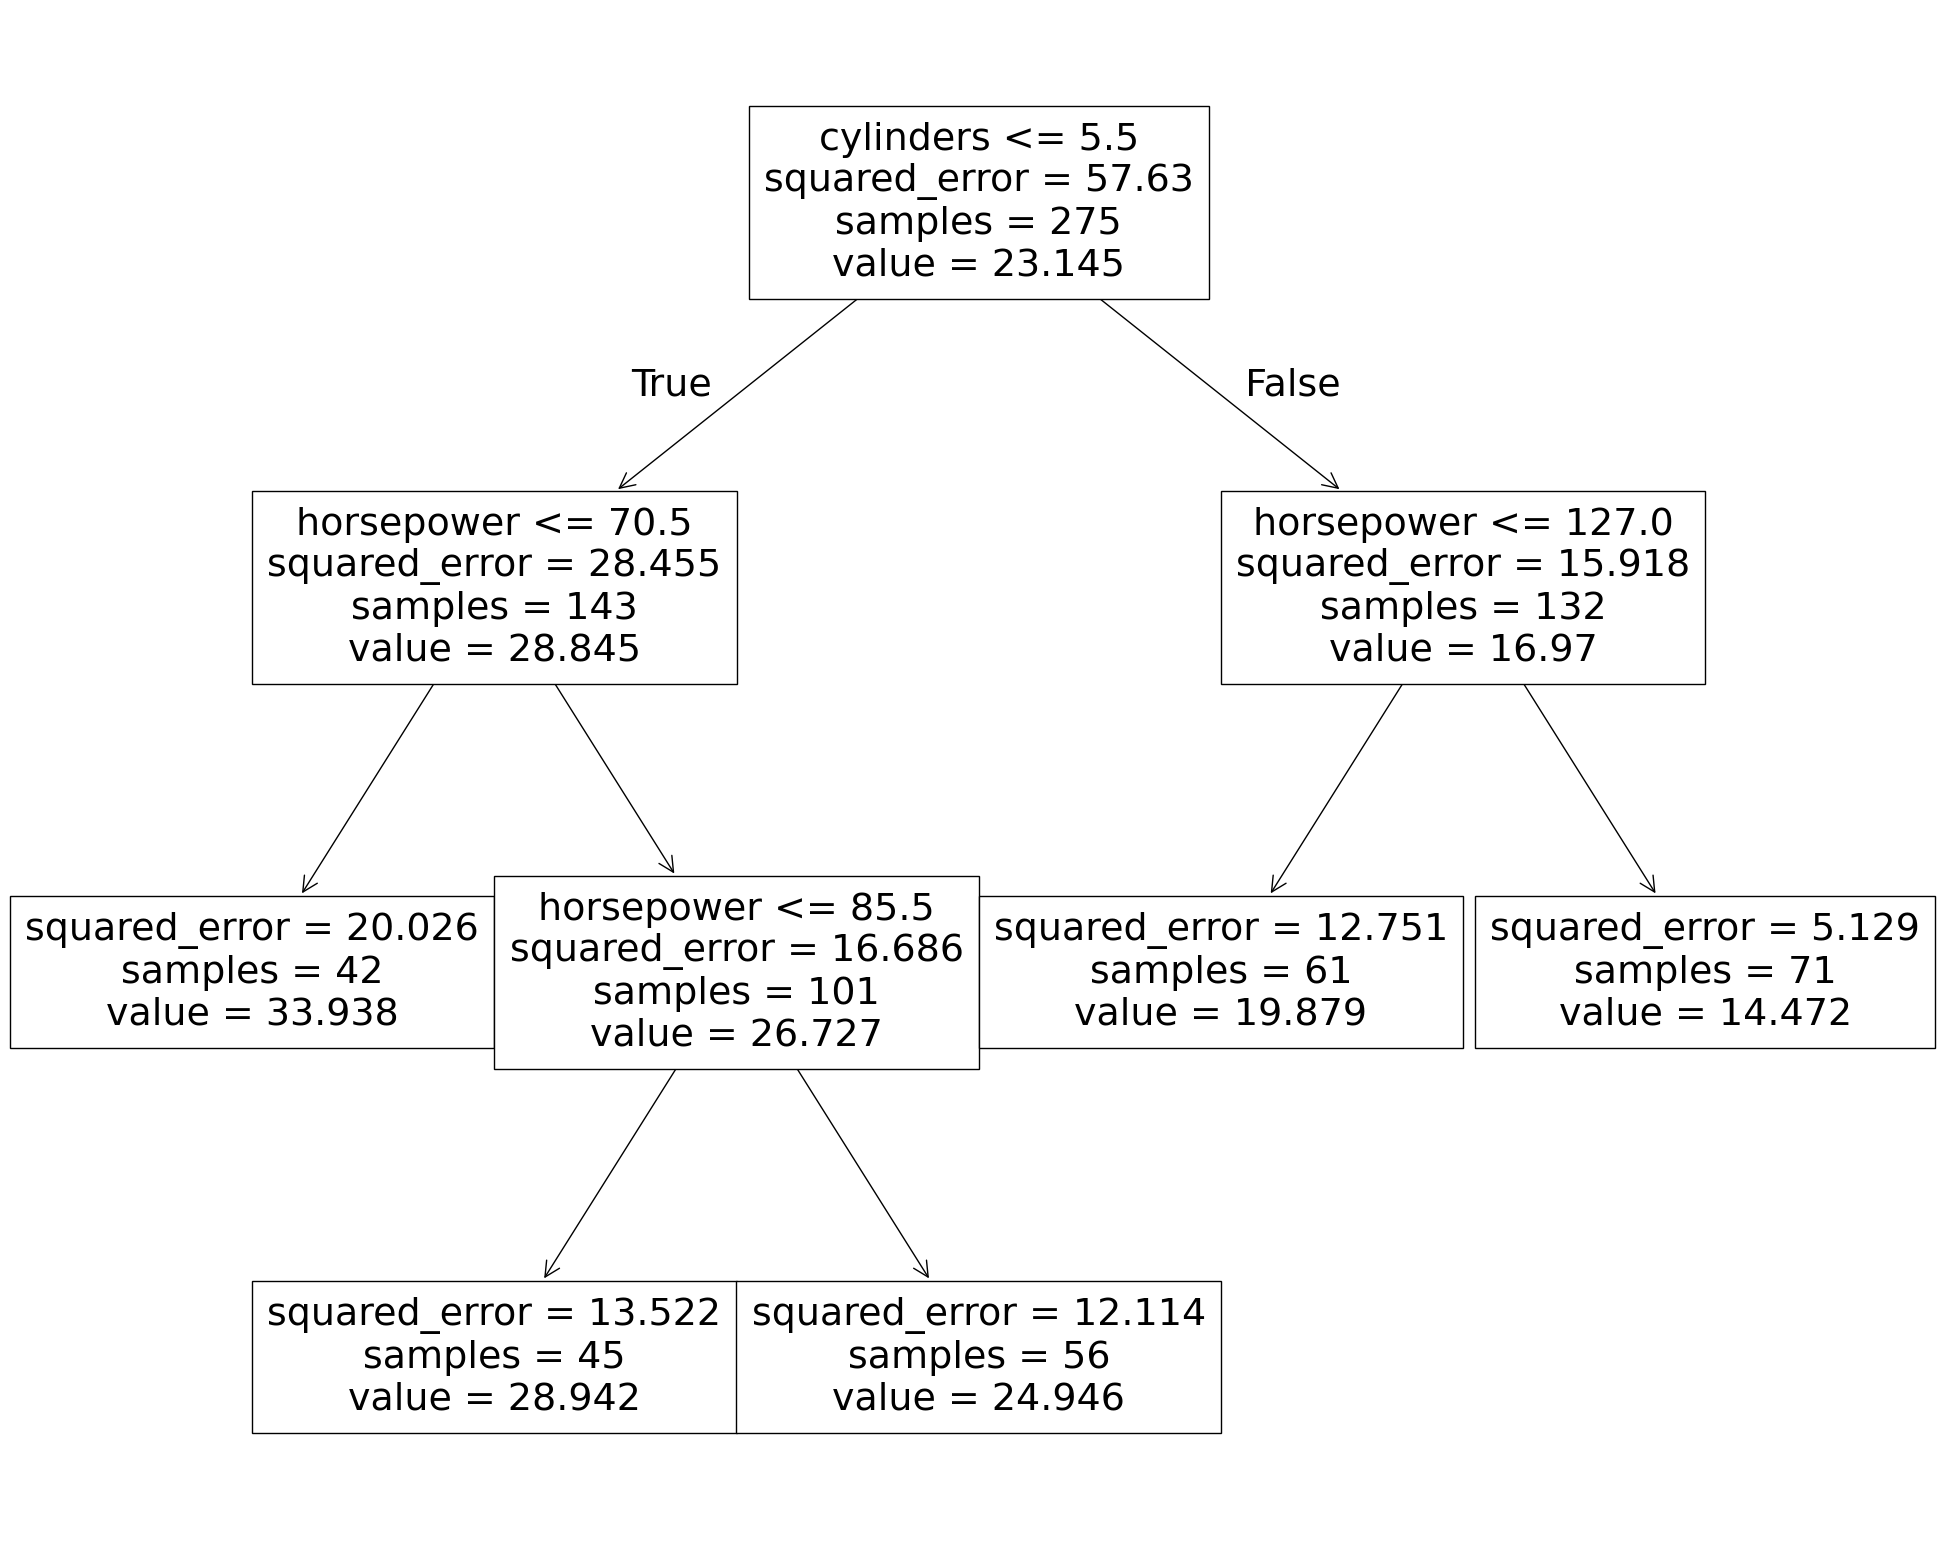

In [55]:
#Best model
#Create decision tree model - model 3
model_2 = DecisionTreeRegressor(criterion = 'squared_error',
                                max_depth = 10, 
                                min_samples_leaf = 5, 
                                ccp_alpha = best_alpha)
#Fit the decision tree regressor on the train
model_2.fit(X_train, y_train)
#Plot the Tree
from sklearn.tree import plot_tree
plt.figure(figsize = (25, 20))
plot_tree(model_2, feature_names = X_train.columns)
plt.show()

In [56]:
#Predict the response in the test - model 2
y_test_pred_2 = model_2.predict(X_test)
#Inverse transformation of predicted values


#Absolute error
abs_err_2 = abs(data_test['mpg'] - y_test_pred_2)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp, 
                         pd.DataFrame({'RMSE': root_mean_squared_error(data_test['mpg'], y_test_pred_2),
                                       'MAPE': mean_absolute_percentage_error(data_test['mpg'], y_test_pred_2) * 100,
                                       'MAE' : abs_err_2.mean(),
                                       'Median of AbsErrors' : abs_err_2.median(),
                                       'SD of AbsErrors' :     abs_err_2.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_2),
                                       'Min of AbsErrors':     abs_err_2.min(),
                                       'Max of AbsErrors':     abs_err_2.max()}, 
                                      index = ['Decision Tree '])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,4.796951,14.737398,3.563689,2.674679,3.224864,3.919394,0.008318,15.457850
Decision Tree,4.877200,14.492045,3.562980,2.438095,3.344828,3.825117,0.053571,18.228169
Decision Tree,4.877200,14.492045,3.562980,2.438095,3.344828,3.825117,0.053571,18.228169


# Random Forest model (not tuned)

In [59]:
#Sample Random Forest model (not tuned) - model 3
from sklearn.ensemble import RandomForestRegressor
#Create random forest model
model_3 = RandomForestRegressor(n_estimators = 100,
                                max_features = 3, 
                                criterion = 'squared_error',
                                max_depth = 10, 
                                min_samples_leaf = 5, 
                                ccp_alpha = 0,
                                random_state = 123)
#Fit the random forest regressor on the train
model_3.fit(X_train, y_train)

#Predict the response in the train
y_train_pred_3 = model_3.predict(X_train)


from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_3)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_3) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_3)))

RMSE: 2.798
MAPE: 8.769
R2: 0.864


### Create hyper-parameters grid

In [60]:
import itertools
n_estimators = [50, 100, 200 ]
max_features = ['sqrt',  None] 
max_depth = [1, 2, 5, 10]
min_samples_leaf = [2 , 5, 10, 15]
params_grid = list(itertools.product(n_estimators, max_features, max_depth, min_samples_leaf))
params_grid = pd.DataFrame(data = params_grid,
                           index = range(1,97), 
                           columns = ['n_estimators', 
                                      'max_features', 
                                      'max_depth', 
                                      'min_samples_leaf'])
params_grid

,n_estimators,max_features,max_depth,min_samples_leaf
1,50,sqrt,1,2
2,50,sqrt,1,5
3,50,sqrt,1,10
4,50,sqrt,1,15
5,50,sqrt,2,2
...,...,...,...,...
92,200,None,5,15
93,200,None,10,2
94,200,None,10,5
95,200,None,10,10


In [63]:
#K-fold cross validation to choose the best model
from sklearn.model_selection import cross_val_score

import time #to measure the processing time
start_time = time.time()
cv_errors = np.zeros(shape = len(params_grid)) #to save cv results
for i in range(len(params_grid)):
    rf_reg = RandomForestRegressor(n_estimators = params_grid.iloc[i, 0],
                                   max_features = params_grid.iloc[i, 1], 
                                   criterion = 'squared_error',
                                   max_depth = params_grid.iloc[i, 2], 
                                   min_samples_leaf = params_grid.iloc[i, 3], 
                                   ccp_alpha = 0)
    scores = cross_val_score(estimator = rf_reg, 
                             X = X_train, 
                             y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 10, n_jobs = -1)
    cv_errors[i] = scores.mean() 
#To check scoring: 
#https://scikit-learn.org/stable/modules/model_evaluation.html
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  126.08329105377197 seconds


In [64]:
#Best model
params_grid.iloc[np.argmax(cv_errors), :]

n_estimators         200
max_features        sqrt
max_depth             10
min_samples_leaf       2
Name: 77, dtype: object

# Random Forest model (tuned)

In [65]:
#Create random forest model - model 3
model_3 = RandomForestRegressor(n_estimators = params_grid.iloc[np.argmax(cv_errors), 0],
                                max_features = params_grid.iloc[np.argmax(cv_errors), 1], 
                                criterion = 'squared_error',
                                max_depth = params_grid.iloc[np.argmax(cv_errors), 2], 
                                min_samples_leaf = params_grid.iloc[np.argmax(cv_errors), 3], 
                                ccp_alpha = 0,
                                random_state = 123)
#Fit the random forest regressor on the train
model_3.fit(X_train, y_train)

#Predict the response in the train
y_train_pred_3 = model_3.predict(X_train)


from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, r2_score
#The root mean squared error
print('RMSE: {:0.3f}'.format(root_mean_squared_error(y_train, y_train_pred_3)))
#The root mean squared error
print('MAPE: {:0.3f}'.format(mean_absolute_percentage_error(y_train, y_train_pred_3) * 100))
#The coefficient of determination
print('R2: {:0.3f}'.format(r2_score(y_train, y_train_pred_3)))

RMSE: 2.191
MAPE: 6.832
R2: 0.917


## Calculate variable importance

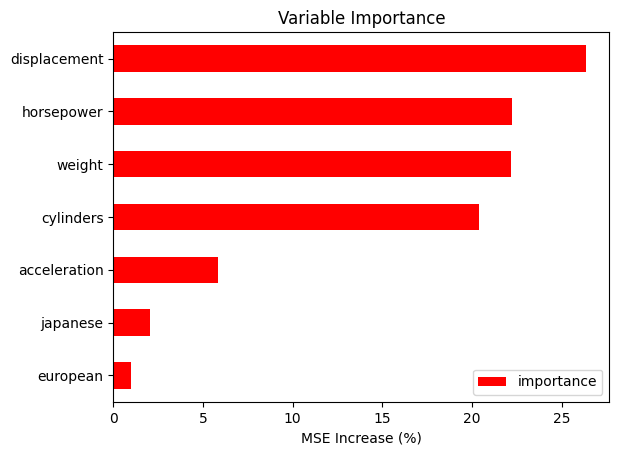

In [66]:
importance = pd.DataFrame({'importance': model_3.feature_importances_ * 100}, 
                          index = X_train.columns)
importance.sort_values(by = 'importance', axis = 0, ascending = True).plot(kind = 'barh', 
                                                                           color = 'r')
plt.title('Variable Importance')
plt.xlabel('MSE Increase (%)')
plt.show()

### Predict the response in the test - model 3

In [70]:
y_test_pred_3 = model_3.predict(X_test)


#Absolute error
abs_err_3 = abs(data_test['mpg'] - y_test_pred_3)

#RMSE, MAPE, MAE, and median, sd, IQR, max, min of absolute errors
from scipy.stats import iqr
models_comp = pd.concat([models_comp,
                         pd.DataFrame({'RMSE': root_mean_squared_error(data_test['mpg'], 
                                                                       y_test_pred_3),
                                       'MAPE': mean_absolute_percentage_error(data_test['mpg'], 
                                                                              y_test_pred_3) * 100,
                                       'MAE' : abs_err_3.mean(),
                                       'Median of AbsErrors' : abs_err_3.median(),
                                       'SD of AbsErrors' :     abs_err_3.std(),
                                       'IQR of AbsErrors':     iqr(abs_err_3),
                                       'Min of AbsErrors':     abs_err_3.min(),
                                       'Max of AbsErrors':     abs_err_3.max()}, 
                                      index = ['Random Forest' ])])
models_comp

,RMSE,MAPE,MAE,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM - All Features,4.796951,14.737398,3.563689,2.674679,3.224864,3.919394,0.008318,15.457850
Decision Tree,4.877200,14.492045,3.562980,2.438095,3.344828,3.825117,0.053571,18.228169
Decision Tree,4.877200,14.492045,3.562980,2.438095,3.344828,3.825117,0.053571,18.228169
Random Forest,4.253708,12.227383,3.074875,2.005405,2.951890,3.155546,0.016668,13.122003
